In [2]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

In [4]:
camp=pd.read_csv('/content/drive/MyDrive/campaign_desc.csv')
camp.count()

DESCRIPTION    30
CAMPAIGN       30
START_DAY      30
END_DAY        30
dtype: int64

In [5]:
camp.head()

,DESCRIPTION,CAMPAIGN,START_DAY,END_DAY
0,TypeB,24,659,719
1,TypeC,15,547,708
2,TypeB,25,659,691
3,TypeC,20,615,685
4,TypeB,23,646,684


In [6]:
camp_tab=pd.read_csv('/content/drive/MyDrive/campaign_table.csv')
camp_tab.head()

,DESCRIPTION,household_key,CAMPAIGN
0,TypeA,17,26
1,TypeA,27,26
2,TypeA,212,26
3,TypeA,208,26
4,TypeA,192,26


In [7]:
camp_tab.count()

DESCRIPTION      7208
household_key    7208
CAMPAIGN         7208
dtype: int64

In [8]:
hh_camp=pd.DataFrame(camp_tab.groupby(['household_key'])['CAMPAIGN'].count()).reset_index()
hh_camp=hh_camp['CAMPAIGN'].sort_values(ascending=False)
camp_count=hh_camp.head(10).reset_index()
camp_count=camp_count[['CAMPAIGN','index']]

In [9]:
camp_count['index']=camp_count['index'].astype(str)

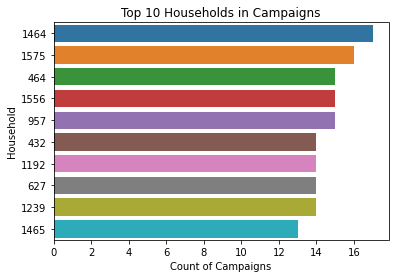

In [10]:
ax=sns.barplot(x=camp_count['CAMPAIGN'],y=camp_count['index'],orient='h')
ax.set(ylabel='Household', xlabel='Count of Campaigns')
plt.title('Top 10 Households in Campaigns')
plt.show()

In [11]:
coupon=pd.read_csv('/content/drive/MyDrive/coupon.csv')
coupon.head()

,COUPON_UPC,PRODUCT_ID,CAMPAIGN
0,10000089061,27160,4
1,10000089064,27754,9
2,10000089073,28897,12
3,51800009050,28919,28
4,52100000076,28929,25


In [12]:
coupon.isna().sum()

COUPON_UPC    0
PRODUCT_ID    0
CAMPAIGN      0
dtype: int64

In [13]:
coupon_red=pd.read_csv('/content/drive/MyDrive/coupon_redempt.csv')
coupon_red.head()

,household_key,DAY,COUPON_UPC,CAMPAIGN
0,1,421,10000085364,8
1,1,421,51700010076,8
2,1,427,54200000033,8
3,1,597,10000085476,18
4,1,597,54200029176,18


In [15]:
coupon_red.isna().sum()

household_key    0
DAY              0
COUPON_UPC       0
CAMPAIGN         0
dtype: int64

In [14]:
demo=pd.read_csv('/content/drive/MyDrive/hh_demographic.csv')
demo.head()

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,household_key
0,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1
1,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,7
2,25-34,U,25-34K,Unknown,2 Adults Kids,3,1,8
3,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2,13
4,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,16
